### Part 2: Pollen Dataset Analysis

#### Objective
This section of the notebook is dedicated to exploring and analyzing the Pollen dataset. Our goal is to predict pollen concentration using linear regression based on various environmental and temporal features. Key tasks will include data loading, conducting initial data analysis, model training across different test splits, and applying feature selection techniques to identify the most influential factors affecting pollen levels.

#### Dataset Source
The Pollen dataset can be accessed through [PMLB (Penn Machine Learning Benchmarks)](https://github.com/EpistasisLab/pmlb), a collection of publicly available datasets for benchmarking machine learning algorithms.

#### Setup
Here we set up our Python environment with necessary imports and configure plot aesthetics for better visualization throughout the notebook.



In [ ]:
pip install pmlb --upgrade

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmlb import fetch_data, dataset_names
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set up matplotlib for better visuals
plt.style.use('ggplot')
# Fetch a specific dataset
pollen_data = fetch_data('529_pollen')
pollen_data.head()

,RIDGE,NUB,CRACK,WEIGHT,target
0,-2.3482,3.6314,5.0289,10.8721,-1.3852
1,-1.1520,1.4805,3.2375,-0.5939,2.1235
2,-2.5245,-6.8633,-2.8037,8.4631,-3.4126
3,5.7523,-6.5091,-5.1510,4.3480,-10.3261
4,8.7494,-3.8978,-1.3834,-14.8776,-2.4153


### **Step 2: Data Loading and Initial Exploration**
Load the pollen dataset, explore initial properties, and visualize the distributions.

             RIDGE          NUB        CRACK       WEIGHT       target
count  3848.000000  3848.000000  3848.000000  3848.000000  3848.000000
mean     -0.003637     0.000160     0.003103     0.004237     0.000166
std       6.398237     5.186311     7.875199    10.043092     3.144395
min     -23.283899   -16.393499   -31.413000   -34.035198   -12.039100
25%      -3.983725    -3.757625    -5.453275    -7.018650    -2.132450
50%      -0.163850    -0.231700    -0.056150    -0.149350    -0.030450
75%       4.647150     3.750525     5.661125     6.799800     2.028625
max      21.406601    17.258301    30.317801    35.802799    10.867300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RIDGE   3848 non-null   float64
 1   NUB     3848 non-null   float64
 2   CRACK   3848 non-null   float64
 3   WEIGHT  3848 non-null   float64
 4   target  3848 non-null   floa

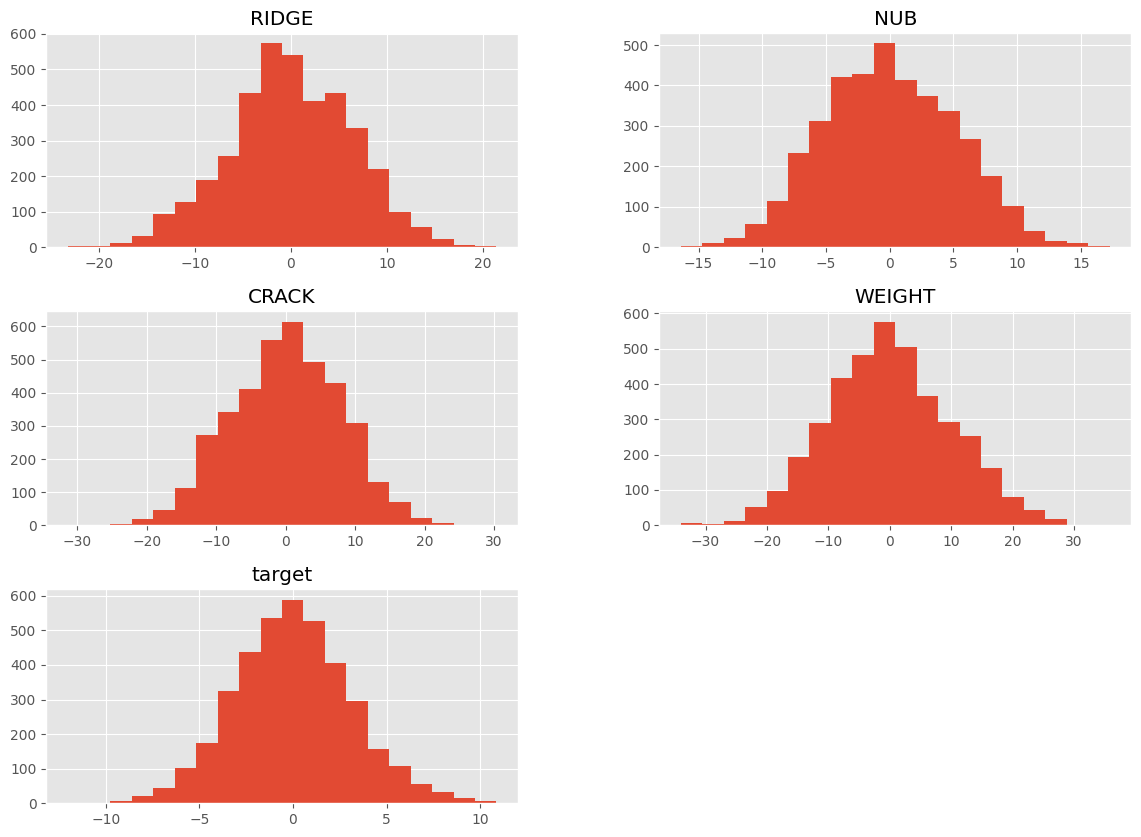

In [ ]:
X = pollen_data.drop('target', axis=1)
y = pollen_data['target']

# Display basic information
print(pollen_data.describe())
print(pollen_data.info())

# Plotting distributions or relationships
pollen_data.hist(bins=20, figsize=(14, 10))
plt.show()

It's seems that there is not even one null value so no need for drop na,

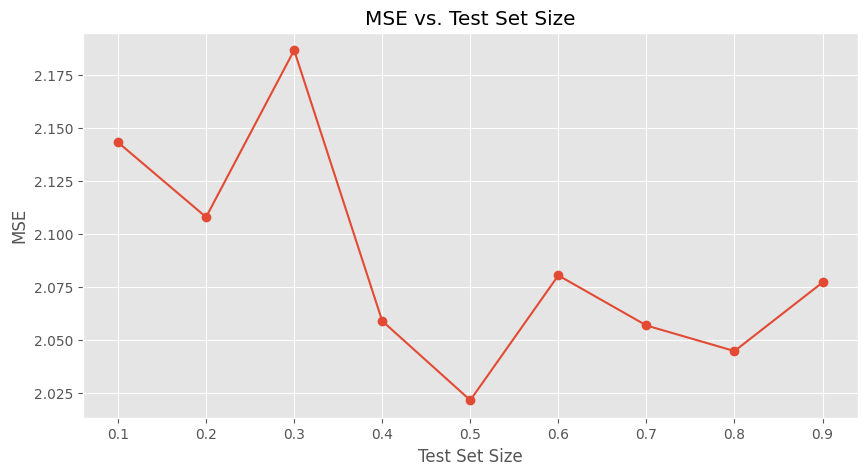

In [ ]:
# Splitting data and training model
test_sizes = np.linspace(0.1, 0.9, 9)
mse_scores = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Plotting the MSE scores
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, mse_scores, marker='o')
plt.title('MSE vs. Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


Best Feature Combination for k=2: ('RIDGE', 'WEIGHT')
Best MSE for k=2: 3.258899905365195
Best Feature Combination for k=3: ('RIDGE', 'NUB', 'WEIGHT')
Best MSE for k=3: 2.1235217072177393


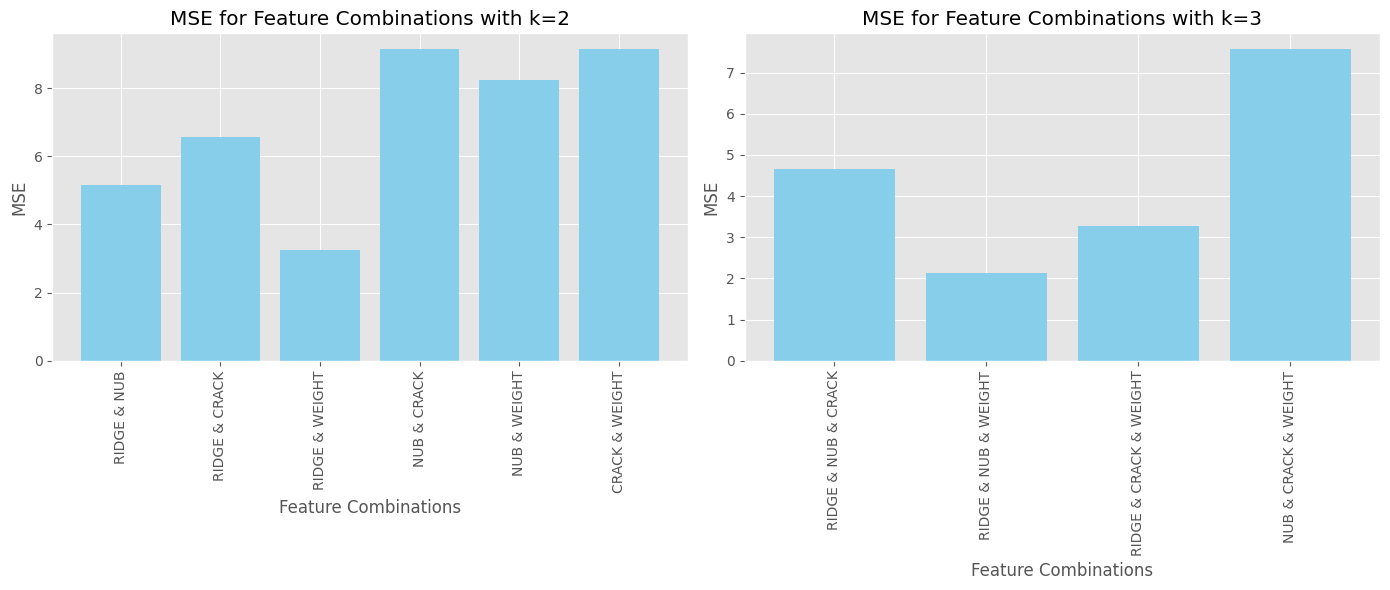

In [ ]:
from itertools import combinations

def evaluate_feature_subset(X, y, features, test_size=0.1):
    """
    Trains a Linear Regression model on a subset of features and evaluates it using MSE.

    Args:
    - X (DataFrame): Feature dataset.
    - y (Series): Target variable.
    - features (list): List of features to use for the model.
    - test_size (float): Fraction of the data to use as the test set.

    Returns:
    - float: The MSE of the model on the test set.
    """
    X_train, X_test, y_train, y_test = train_test_split(X[list(features)], y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Assuming X and y are defined
features = X.columns
best_results = {}
mse_values = {}
feature_combinations = {}

# Iterate for k = 2 and k = 3
for k in [2, 3]:
    best_mse = float('inf')
    best_combo = None
    mse_values[k] = []
    feature_combinations[k] = []

    for combo in combinations(features, k):
        current_mse = evaluate_feature_subset(X, y, combo)
        mse_values[k].append(current_mse)
        feature_combinations[k].append(combo)

        if current_mse < best_mse:
            best_mse = current_mse
            best_combo = combo

    best_results[k] = (best_combo, best_mse)
    print(f"Best Feature Combination for k={k}: {best_combo}")
    print(f"Best MSE for k={k}: {best_mse}")

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, k in enumerate([2, 3]):
    axs[i].bar(range(len(mse_values[k])), mse_values[k], color='skyblue')
    axs[i].set_title(f'MSE for Feature Combinations with k={k}')
    axs[i].set_xticks(range(len(feature_combinations[k])))
    axs[i].set_xticklabels([' & '.join(combo) for combo in feature_combinations[k]], rotation=90)
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Feature Combinations')

plt.tight_layout()
plt.show()
